In [2]:
# Task 1
# 1. What is the core assumption of Naive Bayes?

# The core assumption of Naive Bayes is that all the features (or input variables) are independent of each other given the class label.
# In simple words, it assumes that knowing the value of one feature doesn’t tell you anything about the others — which is kind of “naive” because, in real life,
# features often do relate. But surprisingly, even with this unrealistic assumption, the algorithm works quite well in many situations.

# 2. Differentiate between GaussianNB, MultinomialNB, and BernoulliNB.

# These are just different “flavors” of Naive Bayes, and each one is used depending on the type of data:

# GaussianNB: This one is used when your features are continuous values (like height, weight, temperature). It assumes the data follows a normal (Gaussian) distribution.

# MultinomialNB: Best when features are counts or frequencies, like how many times a word appears in a document (great for text classification). It assumes the features follow a multinomial distribution.

# BernoulliNB: This one is for binary data (features that are just 0 or 1). For example, whether a word appears in a document or not — not how many times.

# 3. Why is Naive Bayes considered suitable for high-dimensional data?

# Naive Bayes is great for high-dimensional data (like text datasets with thousands of words) because:

# It’s super fast and lightweight, both in training and prediction.

# It doesn’t need a lot of memory or computation.

# Its independence assumption avoids the complexity of modeling relationships between a huge number of features.

# Even though it makes that “naive” assumption, it often performs surprisingly well — especially in things like spam detection or sentiment analysis.

In [3]:
# Task 2: Spam Detection using MultinomialNB
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import pandas as pd

# Load SMS Spam dataset
sms_data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv', sep='\t', header=None, names=['label', 'message'])

X_train, X_test, y_train, y_test = train_test_split(sms_data['message'], sms_data['label'], test_size=0.3, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("MultinomialNB SMS Spam Detection:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='spam'))
print("Recall:", recall_score(y_test, y_pred, pos_label='spam'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

MultinomialNB SMS Spam Detection:
Accuracy: 0.9904306220095693
Precision: 0.9814814814814815
Recall: 0.9464285714285714
Confusion Matrix:
 [[1444    4]
 [  12  212]]


In [5]:
#Task 3 :-GaussianNB with Iris or Wine Dataset 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Classification Report (GaussianNB):\n", classification_report(y_test, y_pred_gnb))


log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))


GaussianNB Accuracy: 1.0
Classification Report (GaussianNB):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression Accuracy: 1.0
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Decision Tree Accuracy: 1.0
Classification Report (Decision Tree):
               precision    r

In [7]:
# #ask 4: Conceptual Questions 
# 1. What is entropy and information gain?

# Entropy is a measure of uncertainty or impurity in a dataset. If a dataset is perfectly pure (all samples belong to one class), entropy is 0.
# Information Gain tells us how much entropy is reduced after splitting the data on a feature. Higher info gain means a better split for building the decision tree.
    
# 2. Explain the difference between Gini Index and Entropy.

# Both are used to measure impurity in decision trees.

# Entropy comes from information theory and uses log values, while Gini Index is simpler and uses squared probabilities.

# Gini is usually faster to compute, and both give similar results in most cases.

# 3. How can a decision tree overfit? How can this be avoided?

# A decision tree can overfit when it becomes too complex and tries to perfectly fit the training data, including noise.

# To avoid overfitting, we can:

# Limit the depth of the tree.

# Set a minimum number of samples required to split.

# Use pruning, which means cutting off parts of the tree that don’t improve accuracy much.

# Or simply use ensemble methods like Random Forest for better generalization.
    


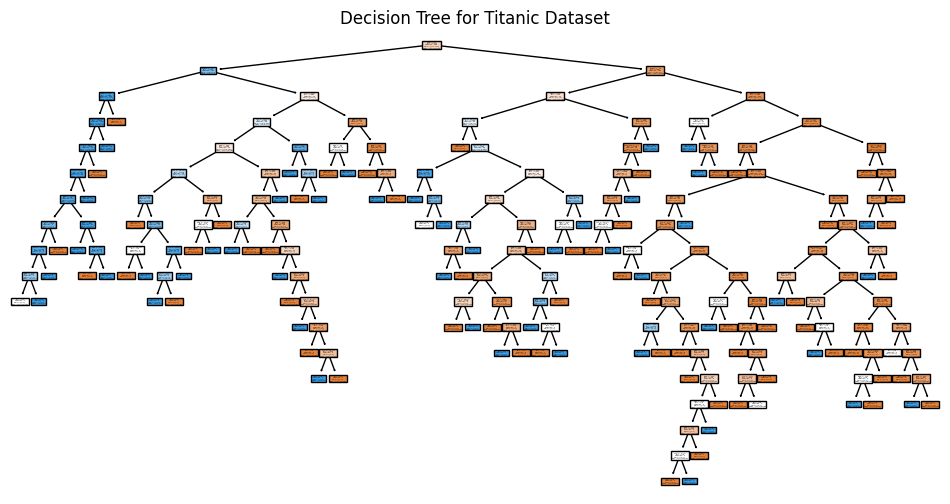


Decision Tree Accuracy (Titanic): 0.6962616822429907
Confusion Matrix:
 [[93 29]
 [36 56]]


In [8]:
# Task 5: Decision Tree on Titanic Dataset
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

titanic = sns.load_dataset("titanic")
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']].dropna()

le_sex = LabelEncoder()
le_embarked = LabelEncoder()
titanic['sex'] = le_sex.fit_transform(titanic['sex'])
titanic['embarked'] = le_embarked.fit_transform(titanic['embarked'])

X = titanic.drop('survived', axis=1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()

print("\nDecision Tree Accuracy (Titanic):", tree.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree.predict(X_test)))

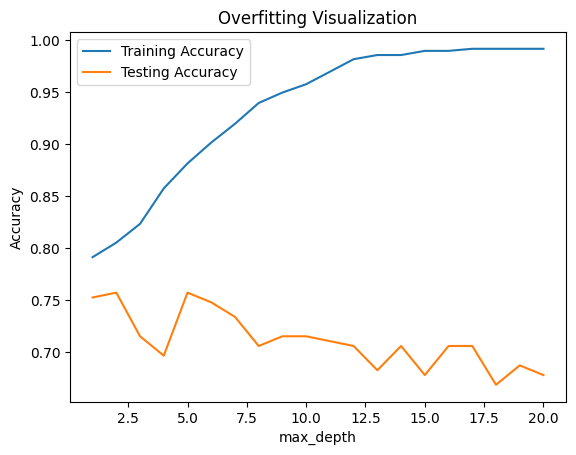

In [9]:
# Task 6: Model Tuning - max_depth effect
depths = list(range(1, 21))
train_acc = []
test_acc = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

plt.plot(depths, train_acc, label='Training Accuracy')
plt.plot(depths, test_acc, label='Testing Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Overfitting Visualization')
plt.show()

In [10]:
# Task 7: Theory Questions
# 1. What is the difference between Bagging and Boosting?
# Bagging builds models independently in parallel, while Boosting builds them sequentially, each correcting the previous one.

# 2. How does Random Forest reduce variance?
# Random Forest reduces variance by averaging predictions from many decision trees trained on random subsets of data and features.

# 3. What is the weakness of boosting-based methods?
# Boosting can be prone to overfitting and sensitive to noisy data or outliers.


Random Forest Accuracy: 0.780373831775701
Random Forest Precision: 0.7710843373493976
Random Forest Recall: 0.6956521739130435


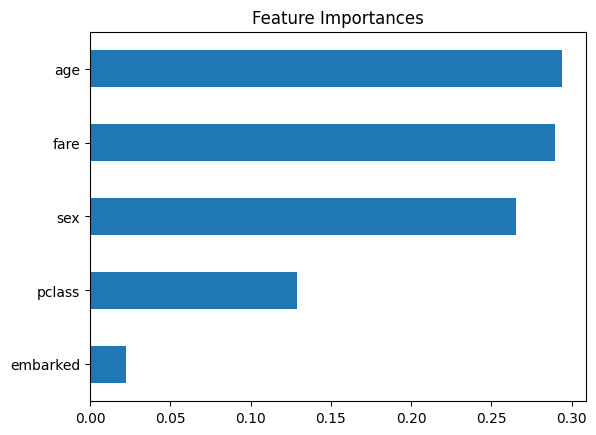

In [11]:
# Task 8: Random Forest vs Decision Tree
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_rf))
print("Random Forest Precision:", precision_score(y_test, y_rf))
print("Random Forest Recall:", recall_score(y_test, y_rf))

# Feature Importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.show()

In [ ]:
import time
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(model, name):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"📊 {name} Results:")
    print(f"  - Accuracy: {acc:.4f}")
    print(f"  - F1 Score: {f1:.4f}")
    print(f"  - Training Time: {end - start:.4f} seconds\n")

# 1. AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
evaluate_model(ada_model, "AdaBoost")

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, "Random Forest")

# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, "Decision Tree")


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


📊 AdaBoost Results:
  - Accuracy: 0.9167
  - F1 Score: 0.9199
  - Training Time: 0.1315 seconds

📊 Random Forest Results:
  - Accuracy: 1.0000
  - F1 Score: 1.0000
  - Training Time: 0.0912 seconds

📊 Decision Tree Results:
  - Accuracy: 0.9444
  - F1 Score: 0.9425
  - Training Time: 0.0000 seconds

